<a href="https://colab.research.google.com/github/xup5/Computational-Neuroscience-Class/blob/main/Integrate%20and%20Fire%20Model/Integrate_and_fire_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrate and Fire Model
Odelia Schwartz 2016, Modified by Xu Pan 2023.

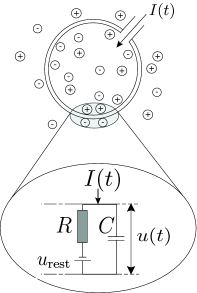


https://neuronaldynamics.epfl.ch/online/Ch1.S3.html


Simple version of Integrate and Fire model. 

dV/dt = -(V-V_0)/RC + I/C

Voltage is determined here by directly solving the differential equation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

deltaT = 1 				# 1 msec time steps
tend = 100

# Define the range of times for the simulation.
times = 200 			# 200 msec simulation

# Starting value of the membrane potential
Vstart = -70

Loop through time, updating the membrane potential and adding
spikes whenever the membrane potential crosses the spike
threshold.

In [ ]:
#@title
I = 5   # @param {type:"slider", min:0, max:20, step:0.1}
R = 5   # @param {type:"slider", min:0, max:20, step:0.1}
C = 6    # @param {type:"slider", min:0, max:20, step:0.1}
k = R*C  # time constant
Vthresh = -55 # threshold for spiking
Vaction = 40 # action potential

# Initialize membrane potential at rest, no spikes
spikes = np.zeros(times)
V = np.zeros(times)

V[0] = Vstart # initialize membrane potential

for i in range(times-1):

  if V[i] > Vthresh:
    # If above spike threshold, generate a spike and reset the
    # membrane potential to Vleak
    V[i] = Vaction
    V[i+1] = Vstart
    spikes[i] = 1
  else:
    # update membrane potential
    dV = -(V[i]-Vstart)/k + I/C
    V[i+1] = V[i] + dV
    # V[i+1] = Vstart + R * I * (1 - np.exp(-times[t]/k))

In [ ]:
# Plot membrane potential and spike train
fig, axs = plt.subplots(2, constrained_layout=True, figsize=(6, 6))
axs[0].plot(V)
axs[0].set_title('Stimulus', fontsize=16)
axs[0].set_ylabel('Membrane potential (mV)')
axs[1].stem(spikes)
axs[1].set_xlabel('Time (msec)')
axs[1].set_ylabel('Neural response')


# To do
Try changing the parameters and re-running:

*   Increase I
*   Set I to 0 and Vstart to 20
*   Decrease R
*   Change C